# Time Series Analysis

First, we will use auto_arima in order to identify the optimal values for p,d,q with minimum AIC.

In [1]:
# Import necessary packages and files

from pmdarima.arima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt
import datetime
df = pd.read_csv("Processed Data.csv",sep ='\t')
sent_df = pd.read_csv("Sentiment Polarity Data.csv",sep='\t') 

In [2]:
df.sample(3)  # Sample Data

,date,time,username,to,replies,retweets,favorites,text,mentions,hashtags,id,permalink,processed_text
358673,2020-05-06,11:37:00,imwadhwa,NaN,1,0,0,@ArvindKejriwal More people will die fighting ...,@ArvindKejriwal,NaN,1257997791072104449,https://twitter.com/imwadhwa/status/1257997791...,USER_MENTION people die fighting liquor covid1...
534935,2020-06-11,22:58:51,Btv_reporter,NaN,0,0,1,")Malaika Arora’s building in Bandra, in which ...",NaN,NaN,1271215347236958208,https://twitter.com/Btv_reporter/status/127121...,malaika building bandra sealed b.m.c whey foun...
155635,2020-04-09,06:46:20,shamunfazalbhoy,SuprabhaBehera,1,1,0,This company @traveltriangle is fraud company ...,@traveltriangle,NaN,1248140168676040704,https://twitter.com/shamunfazalbhoy/status/124...,company USER_MENTION fraud company facing make...


In [3]:
sent_df.sample(3) # Sample Data

,id,processed_text,sentiment,sentiment_score,subjectivity_score
175343,1248938073959747584,government effectively taking measure towards ...,Positive,0.600000,0.800000
521286,1271105608914100224,world seen hastily enforced harsh lockdown soc...,Negative,-0.083333,0.383333
454534,1264751823740534786,covid19 discriminate citizen foreigner yesterd...,Negative,-0.125000,0.125000


In [4]:
# Select only required data

df = df.iloc[:,0:1]
df = sent_df.join(df)
df = df.drop(['subjectivity_score','sentiment_score','processed_text','id'],axis=1)
df

,sentiment,date
0,Negative,2020-03-25
1,Neutral,2020-03-25
2,Negative,2020-03-25
3,Positive,2020-03-25
4,Positive,2020-03-25
...,...,...
582685,Neutral,2020-06-14
582686,Neutral,2020-06-14
582687,Positive,2020-06-14
582688,Positive,2020-06-14


In [5]:
result = df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)  # Group the data and split it into different columns
result = result.transform(lambda x: round(x/sum(x),4)*100,axis=1)  #Find the percentage values for better plotting
result

sentiment,Negative,Neutral,Positive
date,,,
2020-03-25,18.18,35.74,46.08
2020-03-26,19.03,36.42,44.55
2020-03-27,19.03,35.44,45.52
2020-03-28,21.31,34.75,43.94
2020-03-29,20.83,34.94,44.23
...,...,...,...
2020-06-10,23.60,31.51,44.89
2020-06-11,21.86,35.68,42.46
2020-06-12,20.27,37.98,41.75


The change in the percentage of sentiments with respect to each day is really helpful in predicting the future sentiments. We can take the sentiments from March 25 to May 31 (Lockdown 1 to 4) and predict the sentiments of people from June 1 to 14 (If the lockdown was extended).<br /> <br />
The predicted values can be compared with the actual sentiments of people. The actual sentiments of the people was when the lockdown was not extended (Unlock 1.0).

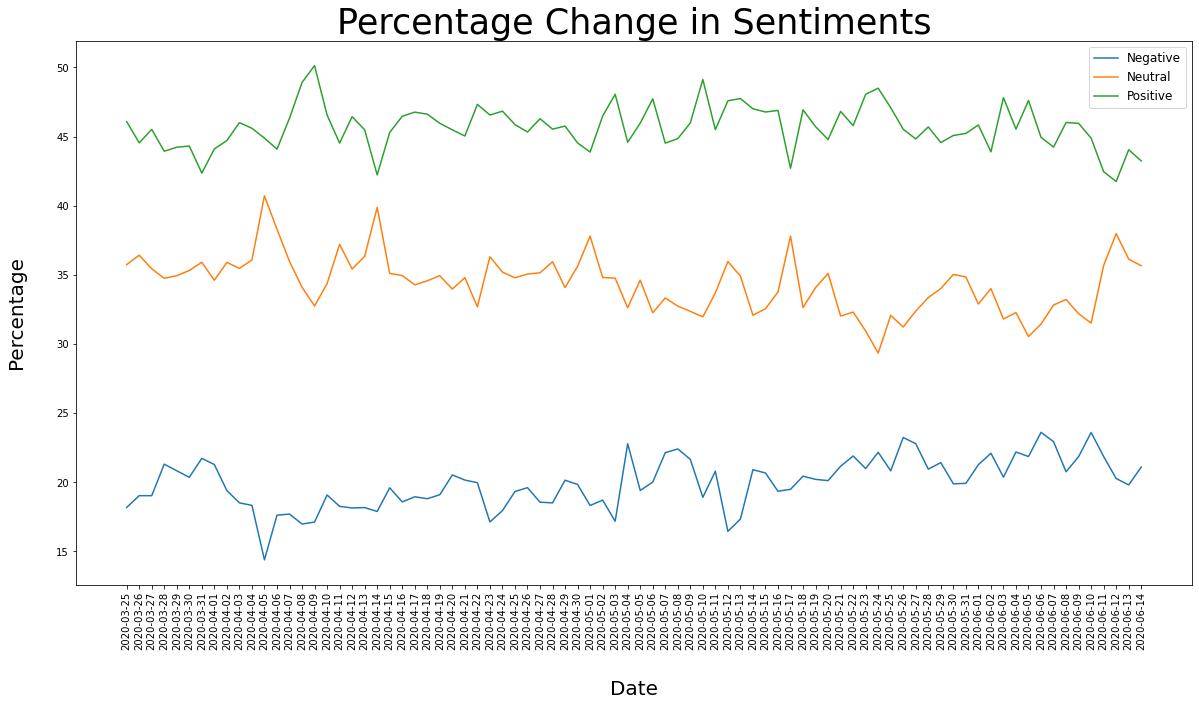

In [6]:
# Plot the data

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(result)
plt.title("Percentage Change in Sentiments",fontsize=35)
plt.xlabel("Date",fontsize=20,labelpad=30)
plt.ylabel("Percentage",fontsize=20,labelpad=30)
plt.legend(labels=result.columns,fontsize=12)

Here we can see that people has a positive outlook towards lockdown. <br/>

We can see that Positive tweets are averaged at 45%, Neutral tweets at 35% and Negative tweets are at 20%.

In [7]:
train = result.iloc[:68]

In [8]:
# First use auto_arima to find the ARIMA parameters for positive sentiments.

model = auto_arima(train.Positive, start_p=1, start_q=1,
                           max_p=10, max_q=10, m=7,
                           seasonal=True,
                           approximations=False,
                           trace=True, d=1,
                           error_action='ignore',  
                           suppress_warnings=True)


Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(1,0,1,7) [intercept=True]; AIC=251.246, BIC=264.474, Time=0.493 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=True]; AIC=269.082, BIC=273.492, Time=0.009 seconds
Fit ARIMA(1,1,0)x(1,0,0,7) [intercept=True]; AIC=267.040, BIC=275.858, Time=0.057 seconds
Fit ARIMA(0,1,1)x(0,0,1,7) [intercept=True]; AIC=253.052, BIC=261.871, Time=0.287 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=False]; AIC=267.086, BIC=269.290, Time=0.009 seconds
Fit ARIMA(1,1,1)x(0,0,1,7) [intercept=True]; AIC=249.286, BIC=260.309, Time=0.325 seconds
Near non-invertible roots for order (1, 1, 1)(0, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,1)x(1,0,0,7) [intercept=True]; AIC=249.269, BIC=260.292, Time=0.388 seconds
Near non-i

In [9]:
print("AIC of model is",model.aic())

AIC of model is 247.6233451641232


In [10]:
train  #Training Data

sentiment,Negative,Neutral,Positive
date,,,
2020-03-25,18.18,35.74,46.08
2020-03-26,19.03,36.42,44.55
2020-03-27,19.03,35.44,45.52
2020-03-28,21.31,34.75,43.94
2020-03-29,20.83,34.94,44.23
...,...,...,...
2020-05-27,22.79,32.38,44.83
2020-05-28,20.95,33.36,45.70
2020-05-29,21.42,34.01,44.57


In [11]:
model.fit(train.Positive)  #Fit the positive data

ARIMA(order=(1, 1, 1), seasonal_order=(0, 0, 0, 7), suppress_warnings=True)

In [12]:
forecast = model.predict(n_periods=14) # Forecast for next 14 days.

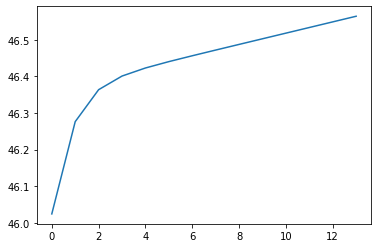

In [13]:
plt.plot(pd.DataFrame(forecast)) #Plot the data

The model has captured an increasing trend for positive tweets.

Since the model was trained with the data during the lockdown days, it predicts the trend of tweets if the lockdown was to continue.

In [14]:
start = datetime.datetime(2020, 6, 1)
end = datetime.datetime(2020, 6, 14)

delta = end - start
test_dates = []
for i in range(delta.days + 1):
    test_dates.append(str(start + datetime.timedelta(days=i)).split()[0])

test_dates 

['2020-06-01',
 '2020-06-02',
 '2020-06-03',
 '2020-06-04',
 '2020-06-05',
 '2020-06-06',
 '2020-06-07',
 '2020-06-08',
 '2020-06-09',
 '2020-06-10',
 '2020-06-11',
 '2020-06-12',
 '2020-06-13',
 '2020-06-14']

In [15]:
predicted_data = pd.DataFrame(forecast,index=test_dates,columns=['Positive'])
predicted_data  

,Positive
2020-06-01,46.024085
2020-06-02,46.276197
2020-06-03,46.363549
2020-06-04,46.400814
2020-06-05,46.422853
2020-06-06,46.440264
2020-06-07,46.456267
2020-06-08,46.471842
2020-06-09,46.487288
2020-06-10,46.502694


Repeat the same process for neutral and negative tweets

In [16]:
model = auto_arima(train.Neutral, start_p=1, start_q=1,
                           max_p=10, max_q=10,m=7,
                           seasonal=True,
                           approximations=False,
                           trace=True, d=1,
                           error_action='ignore',  
                           suppress_warnings=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(1,0,1,7) [intercept=True]; AIC=262.309, BIC=275.537, Time=0.669 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=True]; AIC=280.493, BIC=284.902, Time=0.008 seconds
Fit ARIMA(1,1,0)x(1,0,0,7) [intercept=True]; AIC=277.428, BIC=286.247, Time=0.066 seconds
Fit ARIMA(0,1,1)x(0,0,1,7) [intercept=True]; AIC=268.284, BIC=277.103, Time=0.279 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=False]; AIC=278.496, BIC=280.701, Time=0.009 seconds
Fit ARIMA(1,1,1)x(0,0,1,7) [intercept=True]; AIC=263.157, BIC=274.180, Time=0.275 seconds
Near non-invertible roots for order (1, 1, 1)(0, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,1)x(1,0,0,7) [intercept=True]; AIC=262.999, BIC=274.022, Time=0.365 seconds
Near non-i

In [17]:
print("AIC of model is",model.aic())

AIC of model is 261.7710709409829


In [18]:
model.fit(train.Neutral)

ARIMA(order=(1, 1, 1), seasonal_order=(0, 0, 0, 7), suppress_warnings=True)

In [19]:
forecast = model.predict(n_periods=14) # Forecast for next 14 days.

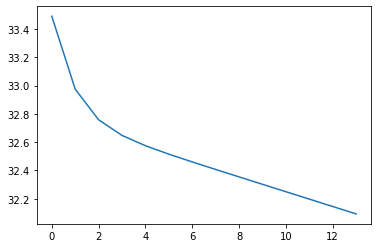

In [20]:
plt.plot(pd.DataFrame(forecast)) #Plot the data

Neutral tweets have a decreasing trend.

In [21]:
predicted_data['Neutral'] = forecast

In [22]:
model = auto_arima(train.Negative, start_p=1, start_q=1,
                           max_p=10, max_q=10, m=7,
                           seasonal=True,
                           approximations=False,
                           trace=True, d=1,
                           error_action='ignore',  
                           suppress_warnings=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(1,0,1,7) [intercept=True]; AIC=248.967, BIC=262.195, Time=0.756 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=True]; AIC=261.137, BIC=265.546, Time=0.012 seconds
Fit ARIMA(1,1,0)x(1,0,0,7) [intercept=True]; AIC=255.297, BIC=264.115, Time=0.072 seconds
Fit ARIMA(0,1,1)x(0,0,1,7) [intercept=True]; AIC=251.297, BIC=260.116, Time=0.072 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=False]; AIC=259.153, BIC=261.358, Time=0.012 seconds
Fit ARIMA(1,1,1)x(0,0,1,7) [intercept=True]; AIC=246.968, BIC=257.992, Time=0.480 seconds
Near non-invertible roots for order (1, 1, 1)(0, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,1)x(1,0,0,7) [intercept=True]; AIC=247.035, BIC=258.059, Time=0.443 seconds
Near non-invertible roots for order (1, 1, 1)(1, 0, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(

In [23]:
print("AIC of model is",model.aic())

AIC of model is 245.71411371299874


In [24]:
model.fit(train.Negative)  #Fit the positive data

ARIMA(order=(1, 1, 1), seasonal_order=(0, 0, 0, 7), suppress_warnings=True)

In [25]:
forecast = model.predict(n_periods=14) # Forecast for next 14 days.

In [26]:
predicted_data['Negative'] = forecast

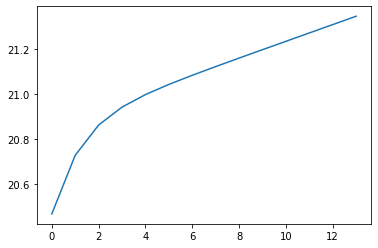

In [27]:
plt.plot(pd.DataFrame(forecast)) #Plot the data

Negative tweets have an increasing trend.

In [28]:
predicted_data

,Positive,Neutral,Negative
2020-06-01,46.024085,33.490210,20.467956
2020-06-02,46.276197,32.974442,20.727892
2020-06-03,46.363549,32.757848,20.862167
2020-06-04,46.400814,32.647299,20.941617
2020-06-05,46.422853,32.574339,20.997147
2020-06-06,46.440264,32.514703,21.042241
2020-06-07,46.456267,32.459789,21.082782
2020-06-08,46.471842,32.406550,21.121336
2020-06-09,46.487288,32.353904,21.159023
2020-06-10,46.502694,32.301469,21.196333


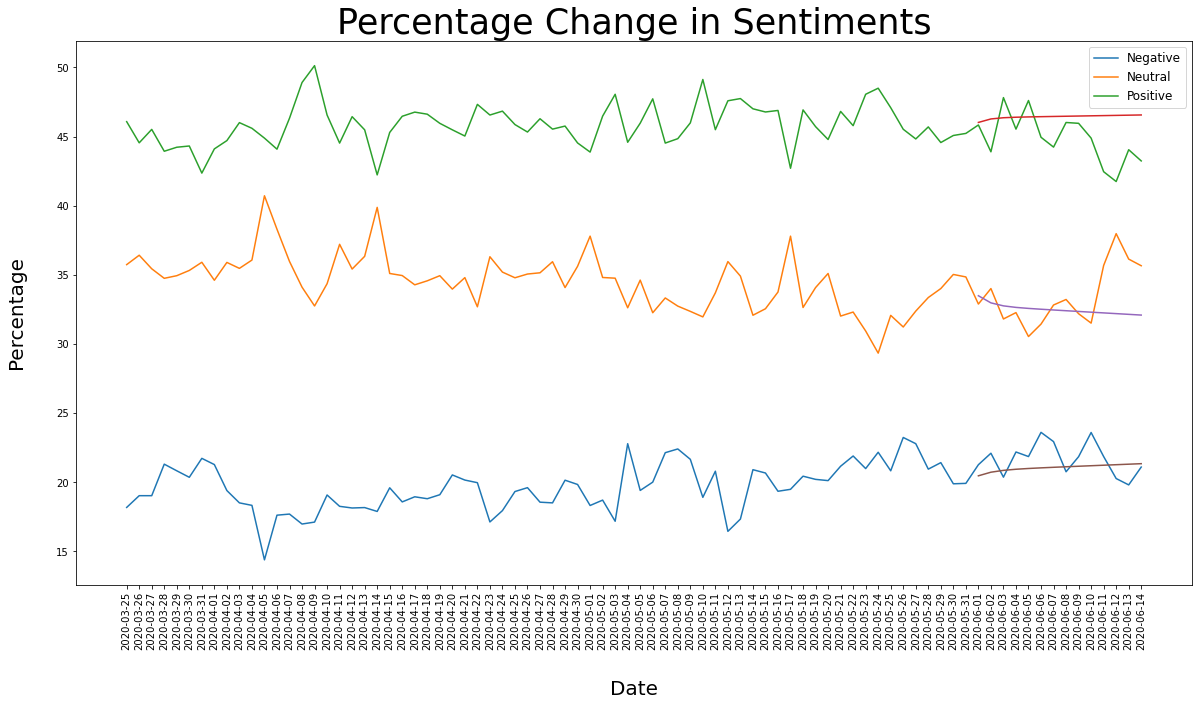

In [29]:
#Plot the data

plt.figure(figsize=(20,10))
plt.plot(result)
plt.plot(predicted_data)
plt.xticks(rotation=90)
plt.title("Percentage Change in Sentiments",fontsize=35)
plt.xlabel("Date",fontsize=20,labelpad=30)
plt.ylabel("Percentage",fontsize=20,labelpad=30)
plt.legend(labels=result.columns,fontsize=12)

The above visualisation shows the sentiments of people. The second line with respect to each line graph shows the predicted sentiments of people if lockdown was extended.

We can see that if the lockdown was extended:
<ul><li>The amount of positive tweets started to increase.</li>
    <li>The amount of neutral tweets started to decrease.</li>
    <li>The amount of negative tweets stayed increase.</li></ul>

So people have a mixed outlook towards the extension of lockdown(Some are happy, some are sad).

In [30]:
# Save the data

predicted_data.to_csv("Time Series Prediction.csv")